In [1]:
import numpy as np
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

# used to access STAC catalogs
from pystac_client import Client
# used fo sign items from the MPC STAC catalog
import planetary_computer

# other libraries for nice outputs
from IPython.display import Image

In [2]:
# Open the MPC STAC catalog.
catalog = Client.open('https://planetarycomputer.microsoft.com/api/stac/v1',
                      modifier = planetary_computer.sign_inplace)

In [3]:
# Create a search for data in the MODIS Vegetation Indices dataset (id = 'modis-13A1-061') from 2023 that intersects the box bounds:
# [-119.28376473993174, 35.561681976121605, -117.15965333370627, 36.65291223580975]
# HINT: You can use the list of coordinates directly in the catalog search without converting it to a JSON format.

modis_collection = catalog.get_child('modis-13A1-061')
modis_collection

id: modis-13A1-061
title: MODIS Vegetation Indices 16-Day (500m)
"description: The Moderate Resolution Imaging Spectroradiometer (MODIS) Vegetation Indices 16-Day Version 6.1 product provides Vegetation Index (VI) values at a per pixel basis at 500 meter (m) spatial resolution. There are two primary vegetation layers. The first is the Normalized Difference Vegetation Index (NDVI), which is referred to as the continuity index to the existing National Oceanic and Atmospheric Administration-Advanced Very High Resolution Radiometer (NOAA-AVHRR) derived NDVI. The second vegetation layer is the Enhanced Vegetation Index (EVI), which has improved sensitivity over high biomass regions. The algorithm for this product chooses the best available pixel value from all the acquisitions from the 16 day period. The criteria used is low clouds, low view angle, and the highest NDVI/EVI value. Provided along with the vegetation layers and two quality assurance (QA) layers are reflectance bands 1 (red), 2 (near-infrared), 3 (blue), and 7 (mid-infrared), as well as four observation layers."
"providers: NASA LP DAAC at the USGS EROS Center (producer, licensor, processor) Microsoft (host, processor)"
type: Collection
"item_assets: {'hdf': {'type': 'application/x-hdf', 'roles': ['data'], 'title': 'Source data containing all bands'}, 'metadata': {'type': 'application/xml', 'roles': ['metadata'], 'title': 'Federal Geographic Data Committee (FGDC) Metadata'}, '500m_16_days_EVI': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': '500m 16 days EVI', 'raster:bands': [{'unit': 'EVI', 'scale': 0.0001, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_NDVI': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': '500m 16 days NDVI', 'raster:bands': [{'unit': 'NDVI', 'scale': 0.0001, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_VI_Quality': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'VI quality indicators', 'raster:bands': [{'data_type': 'uint16', 'spatial_resolution': 500}]}, '500m_16_days_MIR_reflectance': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Surface Reflectance Band 7', 'raster:bands': [{'scale': 0.0001, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_NIR_reflectance': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Surface Reflectance Band 2', 'raster:bands': [{'scale': 0.0001, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_red_reflectance': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Surface Reflectance Band 1', 'raster:bands': [{'scale': 0.0001, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_blue_reflectance': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Surface Reflectance Band 3', 'raster:bands': [{'scale': 0.0001, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_sun_zenith_angle': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Sun zenith angle of VI pixel', 'raster:bands': [{'unit': 'Degree', 'scale': 0.01, 'data_type': 'int16', 'spatial_resolution': 500}]}, '500m_16_days_pixel_reliability': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Quality reliability of VI pixel', 'raster:bands': [{'unit': 'Rank', 'data_type': 'int8', 'spatial_resolution': 500}], 'classification:classes': [{'value': 0, 'description': 'Good data, use with confidence'}, {'value': 1, 'description': 'Marginal data, useful, but look at other QA information'}, {'value': 2, 'description': 'Snow/Ice Target covered with snow/ice'}, {'value': 3, 'description': 'Cloudy data'}]}, '500m_16_days_view_zenith_angle': {'type': 'imag

In [4]:
# temporal range of interest
time_range = "2023-01-01/2024-01-01"

# catalog search
search = catalog.search(
    collections=['modis-13A1-061'],
    bbox=[-119.28376473993174, 35.561681976121605, -117.15965333370627, 36.65291223580975],
    datetime=time_range)
search

In [5]:
items = search.item_collection()

# number of items 
len(items)

41

In [6]:
# Select the first item in the search as a variable item.
# get the first item in the catalog search
item = items[0]
type(item)

pystac.item.Item

In [7]:
# Run item.properties. What kind of Python data structure is this? You can also check it using type.
print('id', item.id)
item.properties

id MYD13A1.A2023313.h08v05.061.2023331221320


{'created': '2023-11-28T03:13:20Z',
 'updated': '2023-11-27T21:33:47.287000Z',
 'datetime': None,
 'platform': 'aqua',
 'proj:epsg': None,
 'proj:wkt2': 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]',
 'proj:shape': [2400, 2400],
 'instruments': ['modis'],
 'end_datetime': '2023-11-24T23:59:59Z',
 'modis:tile-id': '51008005',
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[-10007554.677, 3335851.559],
    [-10007554.677, 4447802.078667],
    [-11119505.196667, 4447802.078667],
    [-11119505.196667, 3335851.559],
    [-10007554.677, 3335851.559]]]},
 'proj:transform': [463.31271652791725,
  0.0,
  -1111

In [ ]:
# Use the 'datetime', 'start_datetime', and 'end_datetime' keys to print the datetime information of the item.
# print(f"datetime: {'datetime', item.datetime }\ndatetime: {'start_datetime', item.start_datetime}\nend_datetime: {'end_datetime', item.end_datetime}")

In [21]:
print(f"start_datetime: {item.properties['start_datetime']}")
print(f"end_datetime: {item.properties['end_datetime']}")
print(f"datetime: {item.properties['datetime']}")

start_datetime: 2023-11-09T00:00:00Z
end_datetime: 2023-11-24T23:59:59Z
datetime: None


In [22]:
item.assets

{'hdf': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061/MYD13A1/08/05/2023313/MYD13A1.A2023313.h08v05.061.2023331221320.hdf?st=2023-11-29T18%3A05%3A15Z&se=2023-12-07T18%3A05%3A15Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-11-30T18%3A05%3A14Z&ske=2023-12-07T18%3A05%3A14Z&sks=b&skv=2021-06-08&sig=HRaG7TfZrJhZ58TGJudJNxOTCP/UzTwmyfaq7WTTRWE%3D>,
 'metadata': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061/MYD13A1/08/05/2023313/MYD13A1.A2023313.h08v05.061.2023331221320.hdf.xml?st=2023-11-29T18%3A05%3A15Z&se=2023-12-07T18%3A05%3A15Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-11-30T18%3A05%3A14Z&ske=2023-12-07T18%3A05%3A14Z&sks=b&skv=2021-06-08&sig=HRaG7TfZrJhZ58TGJudJNxOTCP/UzTwmyfaq7WTTRWE%3D>,
 '500m_16_days_EVI': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061-cogs/MYD13A1/08/05/2023313/M

In [23]:
for key, asset in item.assets.items():
    print(key, '-', asset.title)

hdf - Source data containing all bands
metadata - Federal Geographic Data Committee (FGDC) Metadata
500m_16_days_EVI - 500m 16 days EVI
500m_16_days_NDVI - 500m 16 days NDVI
500m_16_days_VI_Quality - VI quality indicators
500m_16_days_MIR_reflectance - Surface Reflectance Band 7
500m_16_days_NIR_reflectance - Surface Reflectance Band 2
500m_16_days_red_reflectance - Surface Reflectance Band 1
500m_16_days_blue_reflectance - Surface Reflectance Band 3
500m_16_days_sun_zenith_angle - Sun zenith angle of VI pixel
500m_16_days_pixel_reliability - Quality reliability of VI pixel
500m_16_days_view_zenith_angle - View zenith angle of VI Pixel
500m_16_days_relative_azimuth_angle - Relative azimuth angle of VI pixel
500m_16_days_composite_day_of_the_year - Day of year VI pixel
tilejson - TileJSON with default rendering
rendered_preview - Rendered preview


In [34]:
# Identify which key in item.assets has the 500m NDVI asset
# '500m_16_days_NDVI' index [3]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [36]:
item.assets['500m_16_days_NDVI'].title

'500m 16 days NDVI'

In [67]:
# Open the 500m 16 days NDVI data using the href from the corresponding asset and rioxr.open_rasterio(). 
# Store it as a variable named data.
data = rioxr.open_rasterio(item.assets['500m_16_days_NDVI'].href)
data

<xarray.DataArray (band: 1, y: 2400, x: 2400)>
[5760000 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes: (12/183)
    add_offset:                          0.0
    add_offset_err:                      0
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ...                                  ...
    units:                               NDVI
    valid_range:                         -2000, 10000
    VERSIONID:                           61
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -130.540728914638
    _FillValue:                          -3000

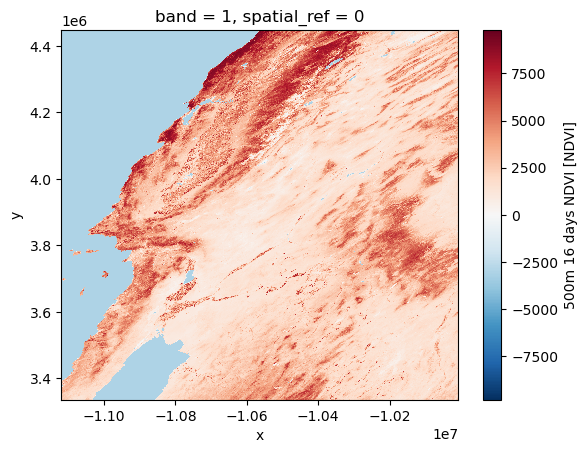

In [68]:
data.sel(band=[1]).plot()

In [72]:
extract = item.assets["500m_16_days_NDVI"].extra_fields["raster:bands"][0]

In [64]:
extract

{'unit': 'NDVI',
 'scale': 0.0001,
 'data_type': 'int16',
 'spatial_resolution': 500}

In [65]:
scale = extract['scale']
scale

0.0001

In [62]:
extract1 = item.assets["500m_16_days_NDVI"].extra_fields["raster:bands"]
extract1

[{'unit': 'NDVI',
  'scale': 0.0001,
  'data_type': 'int16',
  'spatial_resolution': 500}]

In [69]:
# Multiply the data raster by scale to get the actual NDVI values. 
# Store the new raster as a variable ndvi.
ndvi = data*scale

ndvi

<xarray.DataArray (band: 1, y: 2400, x: 2400)>
array([[[-0.3   , -0.3   , -0.3   , ...,  0.2776,  0.2306,  0.2211],
        [-0.3   , -0.3   , -0.3   , ...,  0.3139,  0.2601,  0.2655],
        [-0.3   , -0.3   , -0.3   , ...,  0.2703,  0.2703,  0.279 ],
        ...,
        [ 0.2106,  0.2138,  0.2095, ...,  0.3207,  0.247 ,  0.2651],
        [ 0.219 ,  0.2095,  0.2143, ...,  0.2597,  0.2597,  0.2664],
        [ 0.2133,  0.2052,  0.2431, ...,  0.2725,  0.2738,  0.294 ]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0

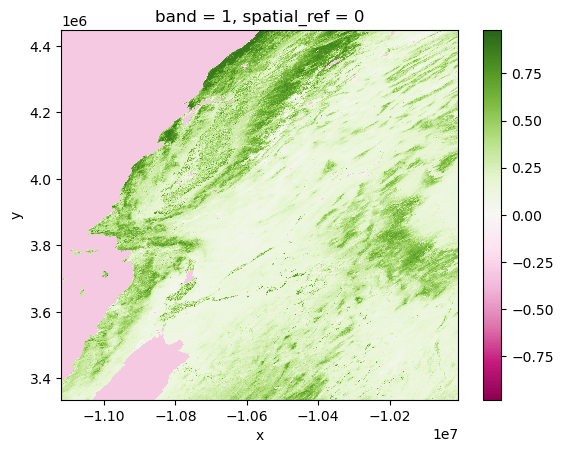

In [70]:
ndvi.plot(cmap="PiYG")